### Importing Library and Datasets

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
appledata = pd.read_csv("AppleStore.csv")    #use your own path for the data set
appledata = appledata[["track_name","price", "rating_count_tot","user_rating", "cont_rating","prime_genre"]]

In [3]:
googledata = pd.read_csv("googleplaystore.csv")    #use your own path for the data set
googledata = googledata[["App", "Price", "Reviews","Rating","Content Rating", "Category"]]

### Equating the two datasets

In [4]:
googledata = googledata.replace("ART_AND_DESIGN", "Education")
googledata = googledata.replace("AUTO_AND_VEHICLES", "Catalogs")
googledata = googledata.replace("BEAUTY", "Lifestyle")
googledata = googledata.replace("BOOKS_AND_REFERENCE", "Book")
googledata = googledata.replace("BUSINESS", "Business")
googledata = googledata.replace("COMICS", "Book")
googledata = googledata.replace("COMMUNICATION", "Productivity")
googledata = googledata.replace("DATING", "Lifestyle")
googledata = googledata.replace("EDUCATION", "Education")
googledata = googledata.replace("ENTERTAINMENT", "Entertainment")
googledata = googledata.replace("EVENTS", "Lifestyle")
googledata = googledata.replace("FAMILY", "Games")
googledata = googledata.replace("FINANCE", "Finance")
googledata = googledata.replace("FOOD_AND_DRINK", "Food & Drink")
googledata = googledata.replace("GAME", "Games")
googledata = googledata.replace("HEALTH_AND_FITNESS", "Health & Fitness")
googledata = googledata.replace("HOUSE_AND_HOME", "Shopping")
googledata = googledata.replace("LIBRARIES_AND_DEMO", "Music")
googledata = googledata.replace("LIFESTYLE", "Lifestyle")
googledata = googledata.replace("MAPS_AND_NAVIGATION", "Navigation")
googledata = googledata.replace("MEDICAL", "Medical")
googledata = googledata.replace("NEWS_AND_MAGAZINES", "News")
googledata = googledata.replace("PARENTING", "Medical")
googledata = googledata.replace("PERSONALIZATION", "Lifestyle")
googledata = googledata.replace("PHOTOGRAPHY", "Photo & Video")
googledata = googledata.replace("PRODUCTIVITY", "Productivity")
googledata = googledata.replace("SHOPPING", "Shopping")
googledata = googledata.replace("SOCIAL", "Social Networking")
googledata = googledata.replace("SPORTS", "Sports")
googledata = googledata.replace("TOOLS", "Utilities")
googledata = googledata.replace("TRAVEL_AND_LOCAL", "Travel")
googledata = googledata.replace("VIDEO_PLAYERS", "Photo & Video")
googledata = googledata.replace("WEATHER", "Weather")

googledata = googledata.replace("Adults only 18+", "17")
googledata = googledata.replace("Everyone", "4")
googledata = googledata.replace("Everyone 10+", "9")
googledata = googledata.replace("Mature 17+", "17")
googledata = googledata.replace("Teen", "12")
googledata = googledata.replace("Unrated", "NaN")

In [5]:
googledata.dropna(inplace=True)
googledata[googledata.isnull().any(axis=1)]

,App,Price,Reviews,Rating,Content Rating,Category


In [6]:
googledata = googledata[googledata["Content Rating"] != "NaN"]
googledata.loc[googledata["Content Rating"] == "NaN"]

,App,Price,Reviews,Rating,Content Rating,Category


In [7]:
googledata['Price'] = googledata['Price'].str.replace('$', '')
googledata = googledata.astype({"Price": 'float64', "Reviews": 'int64', "Rating": 'float64', "Content Rating": 'int64'})
googledata.dtypes

App                object
Price             float64
Reviews             int64
Rating            float64
Content Rating      int64
Category           object
dtype: object

In [8]:
appledata.dtypes

track_name           object
price               float64
rating_count_tot      int64
user_rating         float64
cont_rating          object
prime_genre          object
dtype: object

### 1. How do you visualize price distribution of paid apps ?

In [9]:
#fact generator 
print ('1. Free apps are ' + str(sum(appledata.price == 0)))
print ('2. Counting (outliers) super expensive apps ' + str(sum(appledata.price > 50)))
print (' -  which is around ' + str(sum(appledata.price > 50)/len(appledata.price)*100) +
       " % of the total Apps")
print (' Thus we will dropping the following apps from Apple Store')
appleoutlier = appledata[appledata.price>50][['track_name','price','prime_genre','user_rating']]
applefreeapps = appledata[appledata.price==0]
appleoutlier

1. Free apps are 4056
2. Counting (outliers) super expensive apps 7
 -  which is around 0.09726274836737529 % of the total Apps
 Thus we will dropping the following apps from Apple Store


,track_name,price,prime_genre,user_rating
115,Proloquo2Go - Symbol-based AAC,249.99,Education,4.0
162,NAVIGON Europe,74.99,Navigation,3.5
1136,Articulation Station Pro,59.99,Education,4.5
1479,LAMP Words For Life,299.99,Education,4.0
2181,Articulation Test Center Pro,59.99,Education,4.5
2568,KNFB Reader,99.99,Productivity,4.5
3238,FineScanner Pro - PDF Document Scanner App + OCR,59.99,Business,4.0


In [10]:
#fact generator 
print ('1. Free apps are ' + str(sum(googledata.Price == 0)))
print ('2. Counting (outliers) super expensive apps ' + str(sum(googledata.Price > 100)))
print (' -  which is around ' + str(sum(googledata.Price > 100)/len(googledata.Price)*100) +
       " % of the total Apps")
print (' Thus we will dropping the following apps from Google Store')
googleoutlier = googledata[googledata.Price>100][['App','Price','Category','Rating']]
goolgefreeapps = googledata[googledata.Price==0]
googleoutlier

1. Free apps are 8718
2. Counting (outliers) super expensive apps 15
 -  which is around 0.16017084890549918 % of the total Apps
 Thus we will dropping the following apps from Google Store


,App,Price,Category,Rating
4197,most expensive app (H),399.99,Games,4.3
4362,💎 I'm rich,399.99,Lifestyle,3.8
4367,I'm Rich - Trump Edition,400.00,Lifestyle,3.6
5351,I am rich,399.99,Lifestyle,3.8
5354,I am Rich Plus,399.99,Games,4.0
5355,I am rich VIP,299.99,Lifestyle,3.8
5356,I Am Rich Premium,399.99,Finance,4.1
5357,I am extremely Rich,379.99,Lifestyle,2.9
5358,I am Rich!,399.99,Finance,3.8
5359,I am rich(premium),399.99,Finance,3.5


In [11]:
# removing
applepaidapps = appledata[((appledata.price<50) & (appledata.price>0))]
print('Now the max price of any app in new data is : ' + str(max(applepaidapps.price)))
print('Now the min price of any app in new data is : ' + str(min(applepaidapps.price)))

Now the max price of any app in new data is : 49.99
Now the min price of any app in new data is : 0.99


In [12]:
# removing
googlepaidapps = googledata[((googledata.Price<50) & (googledata.Price>0))]
print('Now the max price of any app in new data is : ' + str(max(googlepaidapps.Price)))
print('Now the min price of any app in new data is : ' + str(min(googlepaidapps.Price)))

Now the max price of any app in new data is : 39.99
Now the min price of any app in new data is : 0.99


Text(0.5,0,'Price Distributions in ($) ')

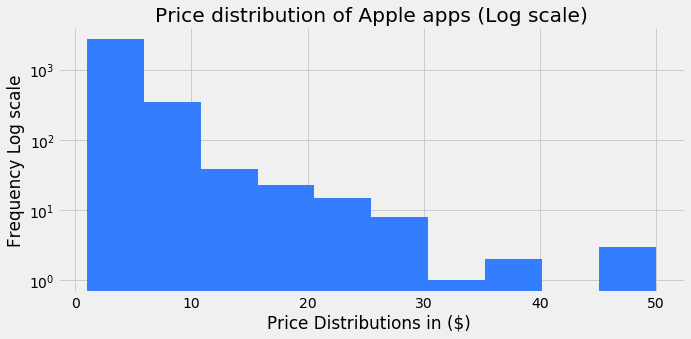

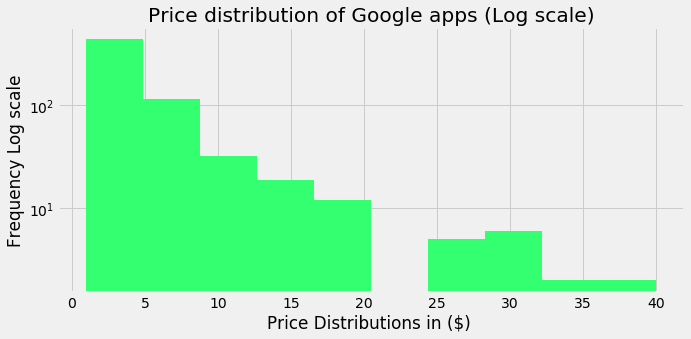

In [13]:
#plot
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)

plt.hist(applepaidapps.price, log=True, color='#337DFF')
plt.title('Price distribution of Apple apps (Log scale)')
plt.ylabel("Frequency Log scale")
plt.xlabel("Price Distributions in ($) ")


plt.style.use('fivethirtyeight')
plt.figure(figsize=(10,10))
plt.subplot(2,1,2)

plt.hist(googlepaidapps.Price, log=True, color='#33FF71')
plt.title('Price distribution of Google apps (Log scale)')
plt.ylabel("Frequency Log scale")
plt.xlabel("Price Distributions in ($) ")


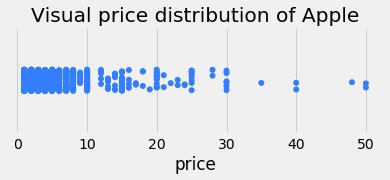

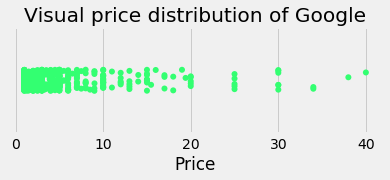

In [14]:
plt.subplot(2,1,1)
plt.title('Visual price distribution of Apple')
sns.stripplot(data=applepaidapps, y='price', jitter= True, orient = 'h', size=6, color='#337DFF')
plt.show()

plt.subplot(2,1,2)
plt.title('Visual price distribution of Google')
sns.stripplot(data=googlepaidapps, y='Price', jitter= True, orient = 'h', size=6, color='#33FF71')
plt.show()

### Insights
-  Count of paid apps is exponentially decreases as the price increases
-  Very few apps have been priced above 30 for Apple and 20 for Google. 
-  So its important to keep price of your app below 30 in Apple and below 20 in Google

### 2. How does the price distribution get affected by category ?

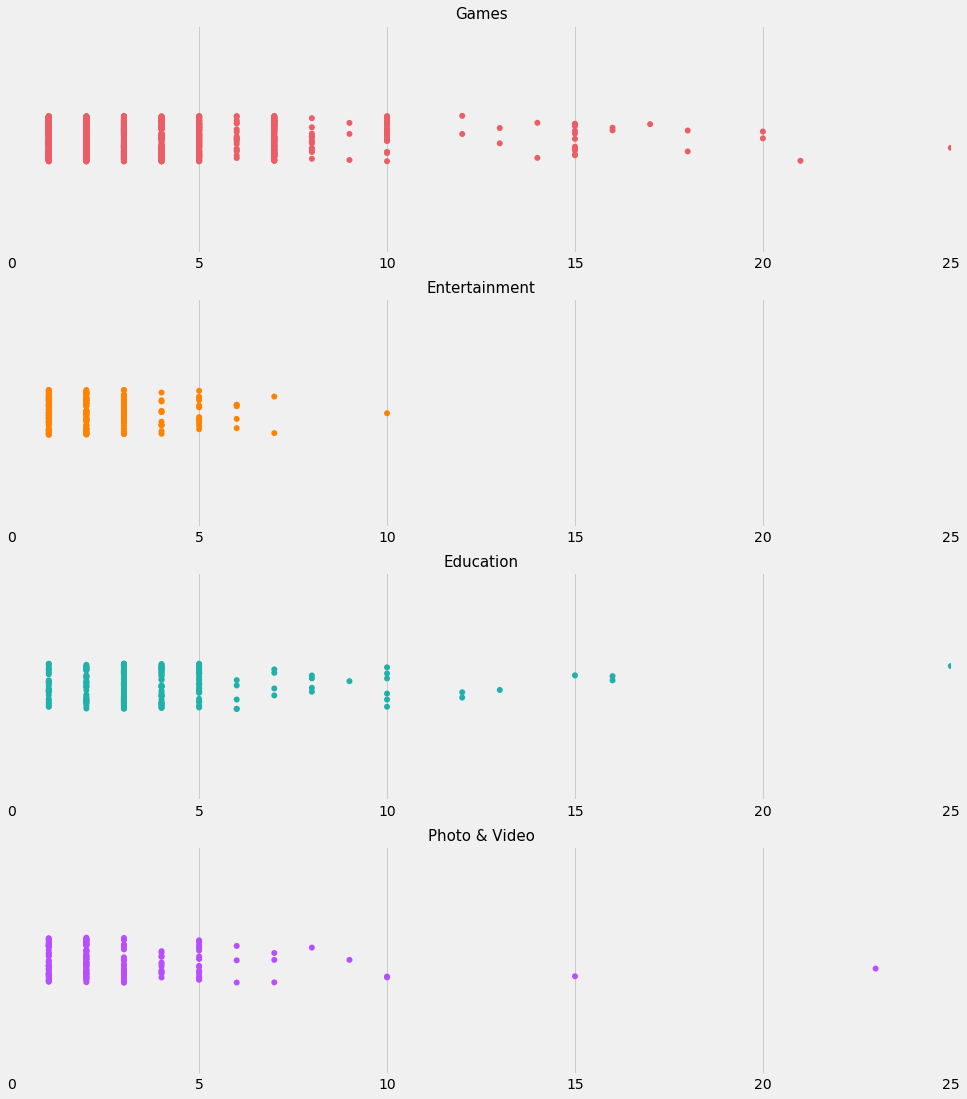

In [15]:
yrange = [0,25]
fsize =15

plt.figure(figsize=(15,18))

plt.subplot(4,1,1)
plt.xlim(yrange)
games = applepaidapps[applepaidapps.prime_genre=='Games']
sns.stripplot(data=games,y='price',jitter= True , orient ='h',size=6,color='#eb5e66')
plt.title('Games',fontsize=fsize)
plt.xlabel('') 

plt.subplot(4,1,2)
plt.xlim(yrange)
ent = applepaidapps[applepaidapps.prime_genre=='Entertainment']
sns.stripplot(data=ent,y='price',jitter= True ,orient ='h',size=6,color='#ff8300')
plt.title('Entertainment',fontsize=fsize)
plt.xlabel('') 

plt.subplot(4,1,3)
plt.xlim(yrange)
edu = applepaidapps[applepaidapps.prime_genre=='Education']
sns.stripplot(data=edu,y='price',jitter= True ,orient ='h' ,size=6,color='#20B2AA')
plt.title('Education',fontsize=fsize)
plt.xlabel('') 

plt.subplot(4,1,4)
plt.xlim(yrange)
pv = applepaidapps[applepaidapps.prime_genre=='Photo & Video']
sns.stripplot(data=pv,y='price',jitter= True  ,orient ='h',size=6,color='#b84efd')
plt.title('Photo & Video',fontsize=fsize)
plt.xlabel('') 

plt.show()

#### Insights
-  Paid gaming apps are highly priced and distribution extends till 25
-  Paid Entertainment apps have a lower price range

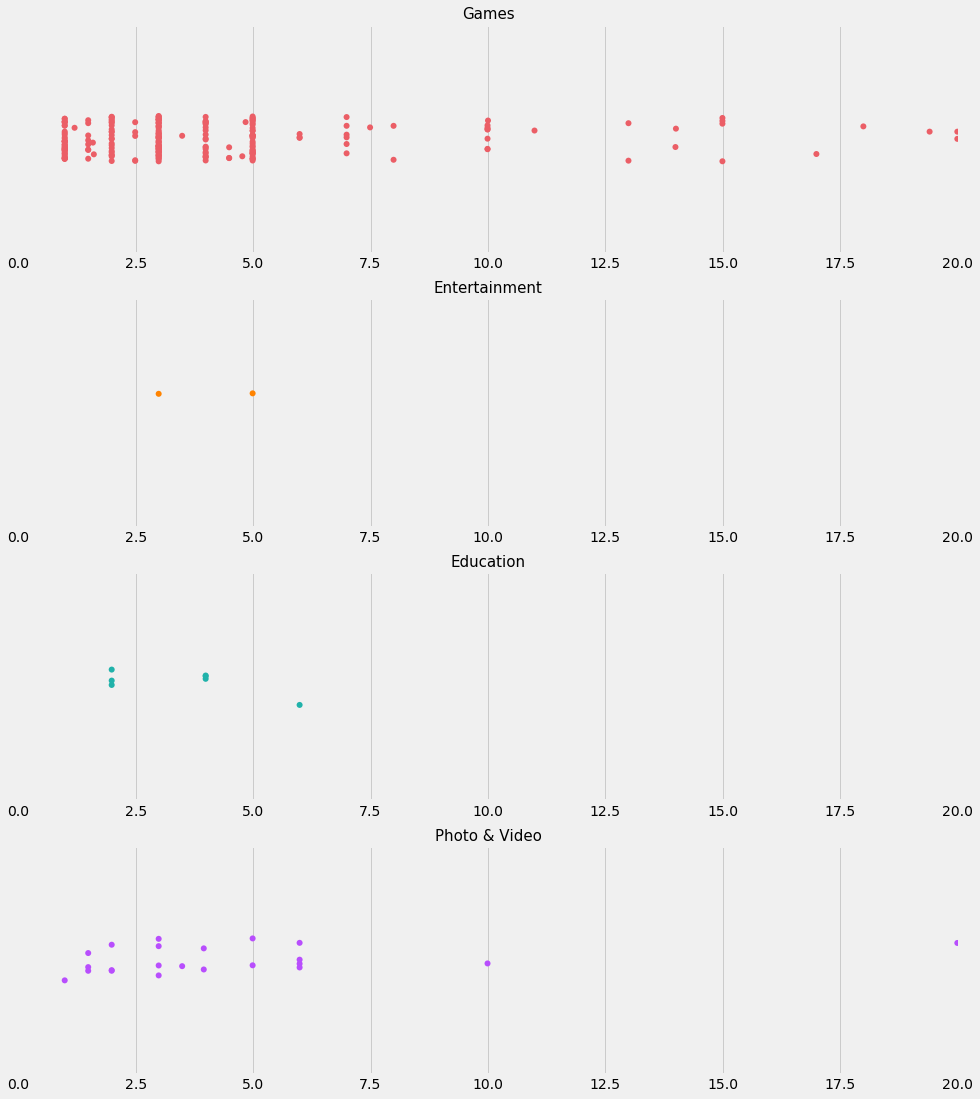

In [16]:
yrange = [0,20]
fsize =15

plt.figure(figsize=(15,18))

plt.subplot(4,1,1)
plt.xlim(yrange)
games = googlepaidapps[googlepaidapps.Category=='Games']
sns.stripplot(data=games,y='Price',jitter= True , orient ='h',size=6,color='#eb5e66')
plt.title('Games',fontsize=fsize)
plt.xlabel('') 

plt.subplot(4,1,2)
plt.xlim(yrange)
ent = googlepaidapps[googlepaidapps.Category=='Entertainment']
sns.stripplot(data=ent,y='Price',jitter= True ,orient ='h',size=6,color='#ff8300')
plt.title('Entertainment',fontsize=fsize)
plt.xlabel('') 

plt.subplot(4,1,3)
plt.xlim(yrange)
edu = googlepaidapps[googlepaidapps.Category=='Education']
sns.stripplot(data=edu,y='Price',jitter= True ,orient ='h' ,size=6,color='#20B2AA')
plt.title('Education',fontsize=fsize)
plt.xlabel('') 

plt.subplot(4,1,4)
plt.xlim(yrange)
pv = googlepaidapps[googlepaidapps.Category=='Photo & Video']
sns.stripplot(data=pv,y='Price',jitter= True  ,orient ='h',size=6,color='#b84efd')
plt.title('Photo & Video',fontsize=fsize)
plt.xlabel('') 

plt.show()

#### Insights
-  Paid gaming apps are highly priced and distribution extends till 20
-  Paid Photo & Video apps have a lower price range

### 3. What about paid apps Vs Free apps ?

In [17]:
print("There are total of " + str(len(appledata.prime_genre.value_counts().index)) 
      + " categories in Apple store which is little too much")

print("There are total of " + str(len(googledata.Category.value_counts().index)) 
      + " categories in Google store which is little too much")

print ("Lets limit our categories to 5")

There are total of 23 categories in Apple store which is little too much
There are total of 22 categories in Google store which is little too much
Lets limit our categories to 5


In [18]:
# reducing the number of categories

s = appledata.prime_genre.value_counts().index[:4]
def categ(x):
    if x in s:
        return x
    else : 
        return "Others"

appledata['broad_genre']= appledata.prime_genre.apply(lambda x : categ(x))

In [19]:
# reducing the number of categories

s = googledata.Category.value_counts().index[:4]
def categ(x):
    if x in s:
        return x
    else : 
        return "Others"

googledata['broad_genre']= googledata.Category.apply(lambda x : categ(x))

In [20]:
free = appledata[appledata.price==0].broad_genre.value_counts().sort_index().to_frame()
paid = appledata[appledata.price>0].broad_genre.value_counts().sort_index().to_frame()
total = appledata.broad_genre.value_counts().sort_index().to_frame()
free.columns=['free']
paid.columns=['paid']
total.columns=['total']
appledist = free.join(paid).join(total)
appledist ['paid_percent'] = appledist.paid*100/appledist.total
appledist ['free_percent'] = appledist.free*100/appledist.total
appledist

,free,paid,total,paid_percent,free_percent
Education,132,321,453,70.860927,29.139073
Entertainment,334,201,535,37.570093,62.429907
Games,2257,1605,3862,41.558778,58.441222
Others,1166,832,1998,41.641642,58.358358
Photo & Video,167,182,349,52.148997,47.851003


In [21]:
free = googledata[googledata.Price==0].broad_genre.value_counts().sort_index().to_frame()
paid = googledata[googledata.Price>0].broad_genre.value_counts().sort_index().to_frame()
total = googledata.broad_genre.value_counts().sort_index().to_frame()
free.columns=['free']
paid.columns=['paid']
total.columns=['total']
googledist = free.join(paid).join(total)
googledist ['paid_percent'] = googledist.paid*100/googledist.total
googledist ['free_percent'] = googledist.free*100/googledist.total
googledist

,free,paid,total,paid_percent,free_percent
Games,2605,239,2844,8.403657,91.596343
Lifestyle,821,89,910,9.780220,90.219780
Others,3983,216,4199,5.144082,94.855918
Productivity,639,40,679,5.891016,94.108984
Utilities,670,63,733,8.594816,91.405184


In [22]:
applelist_free= appledist.free_percent.tolist()
appletuple_free = tuple(applelist_free)
appletuple_paidapps = tuple(appledist.paid_percent.tolist())

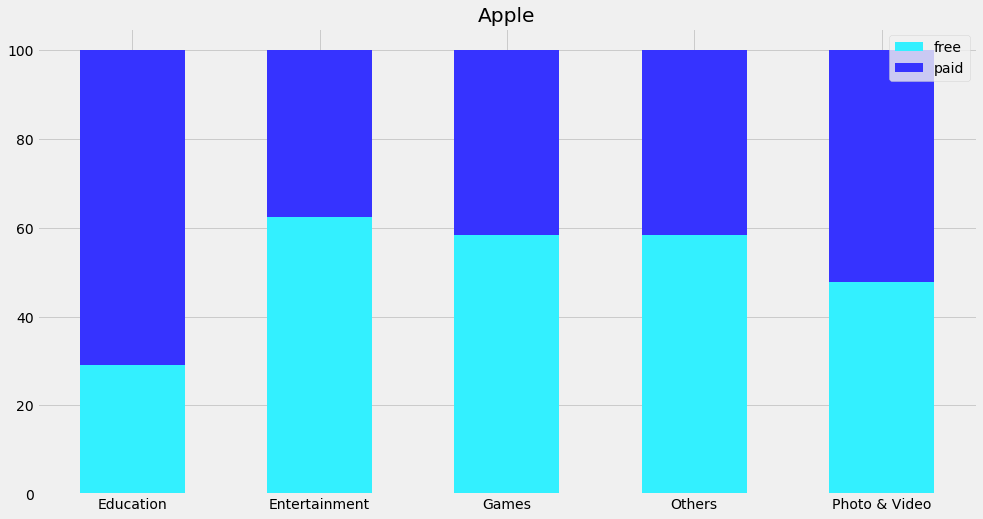

In [23]:
plt.figure(figsize=(15,8))
plt.title("Apple")
N=5
ind = np.arange(N)    # the x locations for the groups
width =0.56   # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, appletuple_free, width, color='#33F0FF')
p2 = plt.bar(ind, appletuple_paidapps, width,bottom=appletuple_free,color='#3633FF')
plt.xticks(ind,tuple(appledist.index.tolist() ))
plt.legend((p1[0], p2[0]), ('free', 'paid'))
plt.show()

# for pie chart
pies = appledist[['free_percent','paid_percent']]
pies.columns=['free %','paid %']
plt.show()

<Figure size 1080x576 with 0 Axes>

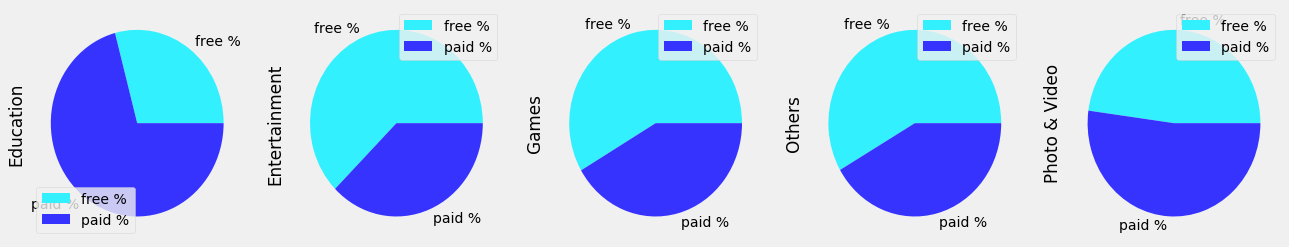

In [24]:
plt.figure(figsize=(15,8))
pies.T.plot.pie(subplots=True,figsize=(20,4),colors=['#33F0FF','#3633FF'])
plt.show()

#### Insights
In Apple
-  Education has significant % of Paid apps.
-  On the contrary - Entertainment & Games category hosts high % of free apps

In [25]:
googlelist_free= googledist.free_percent.tolist()
googletuple_free = tuple(googlelist_free)
googletuple_paidapps = tuple(googledist.paid_percent.tolist())

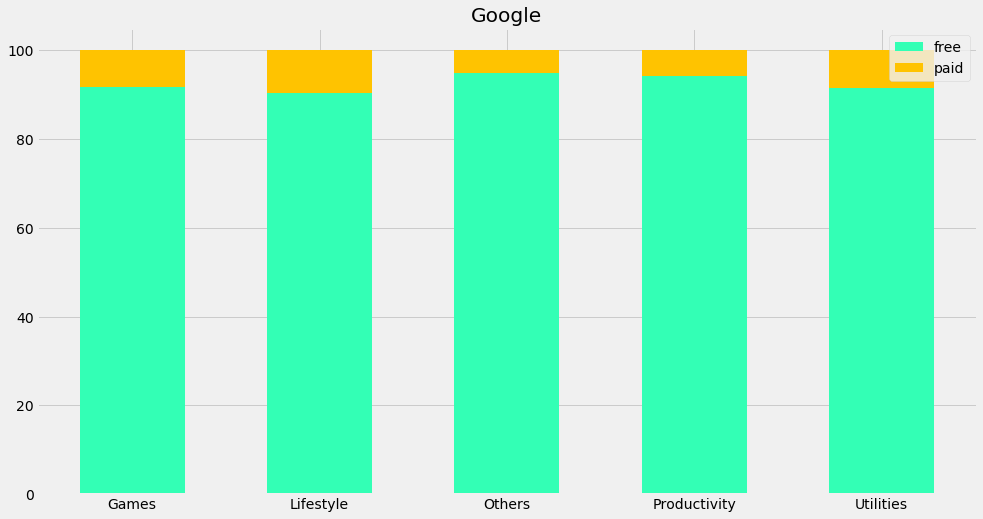

In [26]:
plt.figure(figsize=(15,8))
plt.title("Google")
N=5
ind = np.arange(N)    # the x locations for the groups
width =0.56   # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, googletuple_free, width, color='#33FFB5')
p2 = plt.bar(ind, googletuple_paidapps, width,bottom=googletuple_free,color='#FFC300')
plt.xticks(ind,tuple(googledist.index.tolist() ))
plt.legend((p1[0], p2[0]), ('free', 'paid'))
plt.show()

# for pie chart
pies = googledist[['free_percent','paid_percent']]
pies.columns=['free %','paid %']
plt.show()

<Figure size 1080x576 with 0 Axes>

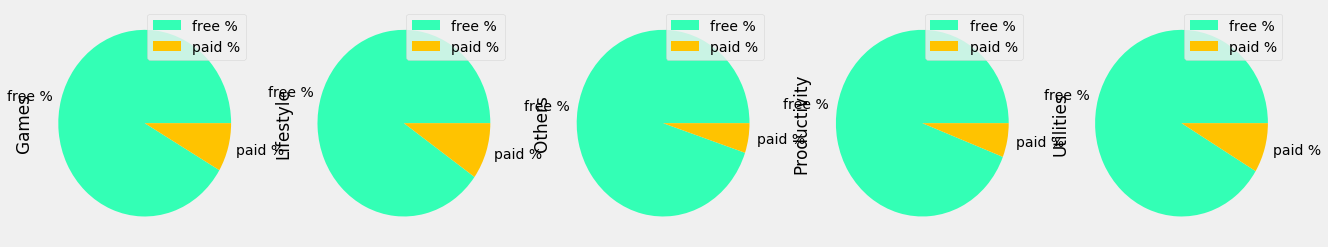

In [27]:
plt.figure(figsize=(15,8))
pies.T.plot.pie(subplots=True,figsize=(20,4),colors=['#33FFB5','#FFC300'])
plt.show()

#### Insights
While in Google
- Games has significant % of Paid apps.
- On the contrary Lifestyle category hosts high % of free apps

### 4. Are paid apps good enough ?

In [28]:
def paid(x):
    if x>0:
        return 'Paid'
    else :
        return'Free'

appledata['category']= appledata.price.apply(lambda x : paid(x))
appledata.tail()

,track_name,price,rating_count_tot,user_rating,cont_rating,prime_genre,broad_genre,category
7192,Kubik,0.00,142,4.5,4+,Games,Games,Free
7193,VR Roller-Coaster,0.00,30,4.5,4+,Games,Games,Free
7194,Bret Michaels Emojis + Lyric Keyboard,1.99,15,4.5,9+,Utilities,Others,Paid
7195,VR Roller Coaster World - Virtual Reality,0.00,85,4.5,12+,Games,Games,Free
7196,Escape the Sweet Shop Series,0.00,3,5.0,4+,Games,Games,Free


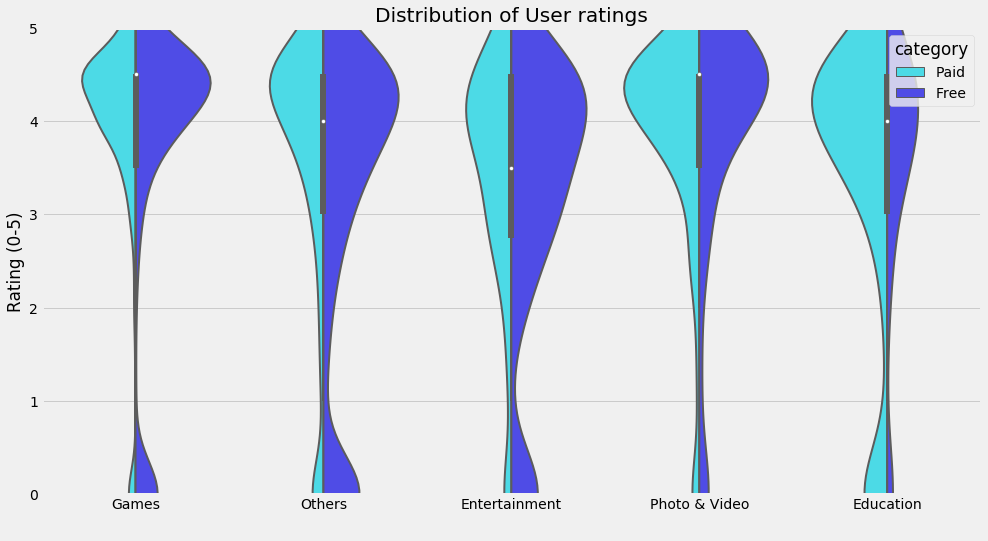

In [29]:
plt.figure(figsize=(15,8))
plt.style.use('fast')
plt.ylim([0,5])
plt.title("Distribution of User ratings")
sns.violinplot(data=appledata, y ='user_rating',x='broad_genre',hue='category',
               vertical=True,kde=False,split=True ,linewidth=2,
               scale ='count', palette=['#33F0FF','#3633FF'])
plt.xlabel(" ")
plt.ylabel("Rating (0-5)")

plt.show()

In [30]:
def paid(x):
    if x>0:
        return 'Paid'
    else :
        return'Free'

googledata['category']= googledata.Price.apply(lambda x : paid(x))
googledata.tail()

,App,Price,Reviews,Rating,Content Rating,Category,broad_genre,category
10834,FR Calculator,0.0,7,4.0,4,Games,Games,Free
10836,Sya9a Maroc - FR,0.0,38,4.5,4,Games,Games,Free
10837,Fr. Mike Schmitz Audio Teachings,0.0,4,5.0,4,Games,Games,Free
10839,The SCP Foundation DB fr nn5n,0.0,114,4.5,17,Book,Others,Free
10840,iHoroscope - 2018 Daily Horoscope & Astrology,0.0,398307,4.5,4,Lifestyle,Lifestyle,Free


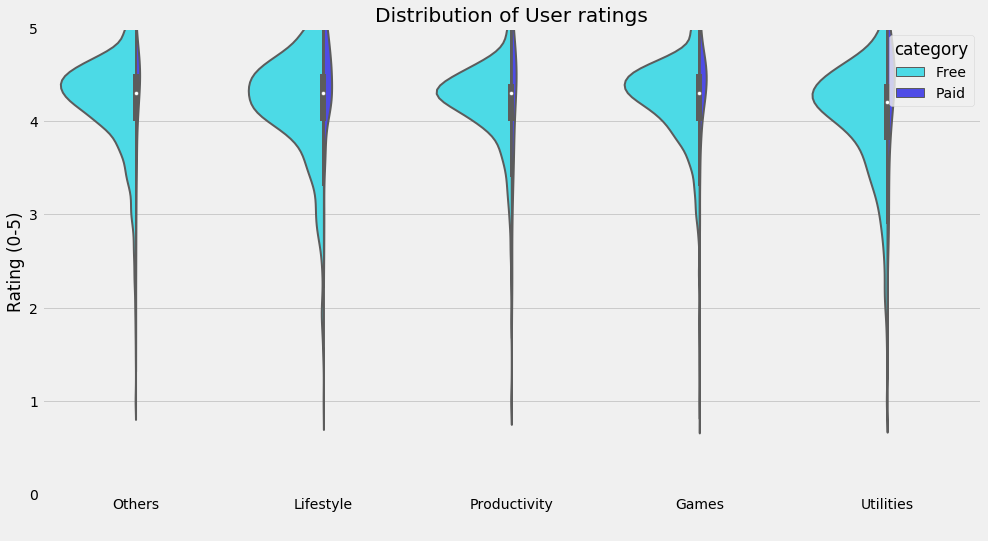

In [31]:
plt.figure(figsize=(15,8))
plt.style.use('fast')
plt.ylim([0,5])
plt.title("Distribution of User ratings")
sns.violinplot(data=googledata, y ='Rating',x='broad_genre',hue='category',
               vertical=True,kde=False,split=True ,linewidth=2,
               scale ='count', palette=['#33F0FF','#3633FF'])
plt.xlabel(" ")
plt.ylabel("Rating (0-5)")

plt.show()

### 5. How are the apps distributed category wise ? can we split by paid category ?

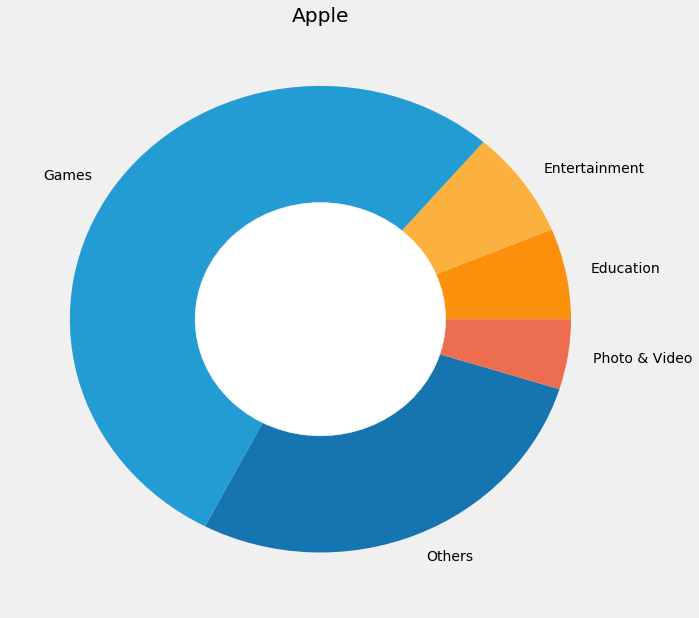

In [32]:
BlueOrangeWapang = ['#fc910d','#fcb13e','#239cd3','#1674b1','#ed6d50']
plt.figure(figsize=(10,10))
applelabel_names=appledata.broad_genre.value_counts().sort_index().index
applesize = appledata.broad_genre.value_counts().sort_index().tolist()
applemy_circle=plt.Circle( (0,0), 0.5, color='white')
plt.pie(applesize, labels=applelabel_names, colors=BlueOrangeWapang)
p=plt.gcf()
p.gca().add_artist(applemy_circle)
plt.title("Apple")
plt.show()

<Figure size 720x720 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

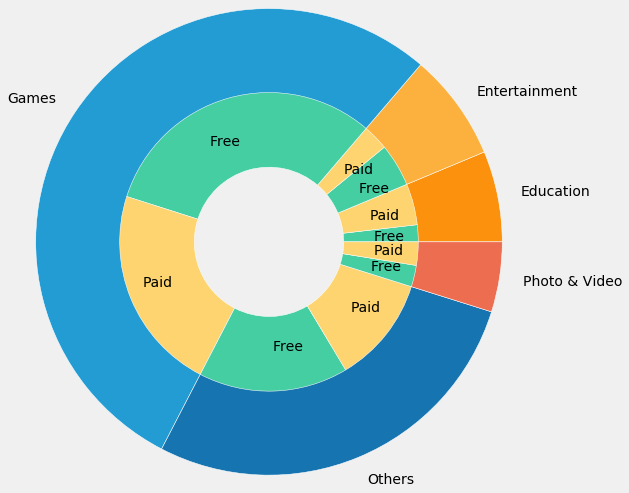

In [33]:
plt.figure(figsize=(10,10))
f=pd.DataFrame(index=np.arange(0,10,2),data=appledist.free.values,columns=['num'])
p=pd.DataFrame(index=np.arange(1,11,2),data=appledist.paid.values,columns=['num'])
final = pd.concat([f,p],names=['labels']).sort_index()
final.num.tolist()

plt.figure(figsize=(20,20))
group_names=appledata.broad_genre.value_counts().sort_index().index
group_size=appledata.broad_genre.value_counts().sort_index().tolist()
h = ['Free', 'Paid']
subgroup_names= 5*h
sub= ['#45cea2','#fdd470']
subcolors= 5*sub
subgroup_size=final.num.tolist()


# First Ring (outside)
fig, ax = plt.subplots()
ax.axis('equal')
mypie, _ = ax.pie(group_size, radius=2.5, labels=group_names, colors=BlueOrangeWapang)
plt.setp( mypie, width=1.2, edgecolor='white')

# Second Ring (Inside)
mypie2, _ = ax.pie(subgroup_size, radius=1.6, labels=subgroup_names, labeldistance=0.7, colors=subcolors)
plt.setp( mypie2, width=0.8, edgecolor='white')
plt.margins(0,0)

# show it
plt.show()

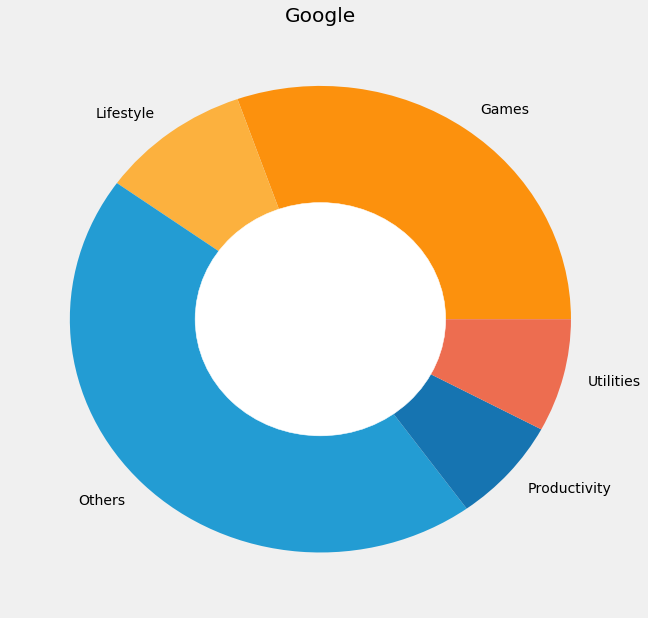

In [34]:
BlueOrangeWapang = ['#fc910d','#fcb13e','#239cd3','#1674b1','#ed6d50']
plt.figure(figsize=(10,10))
googlelabel_names=googledata.broad_genre.value_counts().sort_index().index
googlesize = googledata.broad_genre.value_counts().sort_index().tolist()
googlemy_circle=plt.Circle( (0,0), 0.5, color='white')
plt.pie(googlesize, labels=googlelabel_names, colors=BlueOrangeWapang)
p=plt.gcf()
p.gca().add_artist(googlemy_circle)
plt.title("Google")
plt.show()

<Figure size 720x720 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

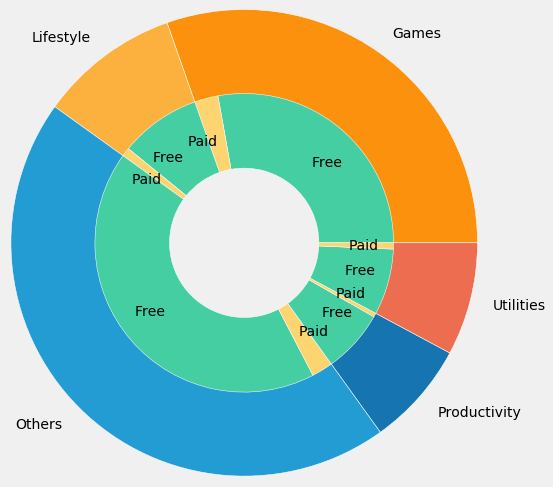

In [35]:
plt.figure(figsize=(10,10))
f=pd.DataFrame(index=np.arange(0,10,2),data=googledist.free.values,columns=['num'])
p=pd.DataFrame(index=np.arange(1,11,2),data=googledist.paid.values,columns=['num'])
final = pd.concat([f,p],names=['labels']).sort_index()
final.num.tolist()

plt.figure(figsize=(20,20))
group_names=googledata.broad_genre.value_counts().sort_index().index
group_size=googledata.broad_genre.value_counts().sort_index().tolist()
h = ['Free', 'Paid']
subgroup_names= 5*h
sub= ['#45cea2','#fdd470']
subcolors= 5*sub
subgroup_size=final.num.tolist()


# First Ring (outside)
fig, ax = plt.subplots()
ax.axis('equal')
mypie, _ = ax.pie(group_size, radius=2.5, labels=group_names, colors=BlueOrangeWapang)
plt.setp( mypie, width=1.2, edgecolor='white')

# Second Ring (Inside)
mypie2, _ = ax.pie(subgroup_size, radius=1.6, labels=subgroup_names, labeldistance=0.7, colors=subcolors)
plt.setp( mypie2, width=0.8, edgecolor='white')
plt.margins(0,0)

# show it
plt.show()